##Import libraries

In [56]:
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')

#import scipy.stats as stats
import seaborn as sns
import random


## Central Limit Theorem

In [57]:
# Central Limit Theorem

def central_limit_theorem(data,n_samples = 1000, sample_size = 500):
    """ Use this function to demonstrate Central Limit Theorem. 
        data = 1D array, or a pd.Series
        n_samples = number of samples to be created
        sample_size = size of the individual sample """
    %matplotlib inline
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    min_value = 0  # minimum index of the data
    max_value = data.count()  # maximum index of the data
    b = {}
    for i in range(n_samples):
        x = np.unique(np.random.randint(min_value, max_value, size = sample_size)) # set of random numbers with a specific size
        b[i] = data[x].mean()   # mean of each sample
    c = pd.DataFrame()
    c['sample'] = b.keys()  # sample number 
    c['Mean'] = b.values()  # mean of that particular sample
    plt.figure(figsize= (15,5))

    plt.subplot(1,2,2)
    sns.distplot(c.Mean)
    plt.title(f"Sampling Distribution. \n \u03bc = {round(c.Mean.mean(), 3)} & SE = {round(c.Mean.std(),3)}")
    plt.xlabel('data')
    plt.ylabel('freq')

    plt.subplot(1,2,1)
    sns.distplot(data)
    plt.title(f"Population Distribution. \n \u03bc = {round(data.mean(), 3)} & \u03C3 = {round(data.std(),3)}")
    plt.xlabel('data')
    plt.ylabel('freq')

    plt.show()


## Read the stock close

In [58]:
df = pd.read_csv('nifty Jan 18th.csv')
df.describe()

,Close
count,250.000000
mean,11245.349400
std,1544.350946
min,7610.250000
25%,10122.650000
50%,11319.925000
75%,12104.762500
max,14595.600000


In [59]:
df.head()

,Date,Close
0,20-Jan-2020,12224.55
1,21-Jan-2020,12169.85
2,22-Jan-2020,12106.90
3,23-Jan-2020,12180.35
4,24-Jan-2020,12248.25


In [60]:
close =df.Close
close.head()

0    12224.55
1    12169.85
2    12106.90
3    12180.35
4    12248.25
Name: Close, dtype: float64

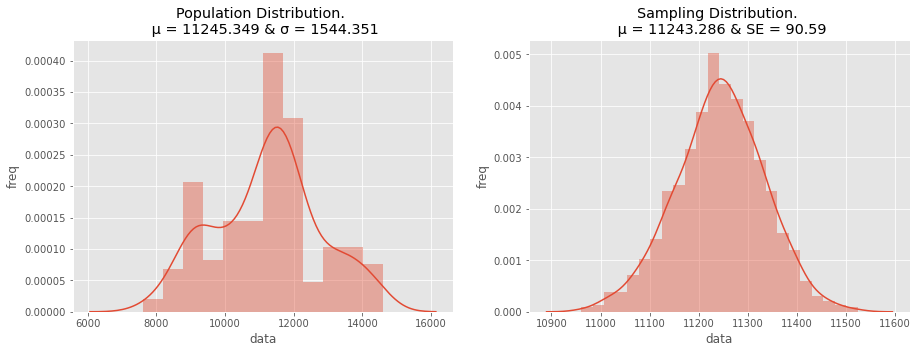

In [61]:
central_limit_theorem(close,n_samples = 1000, sample_size = 200)

# Stock market risk analytics using MC

In [62]:
def prepare(instrument):
    instrument = instrument[instrument['Close'].notna()]
    instrument['Daily Return Percent'] = instrument['Close'].pct_change(1)
    instrument['Log Return'] = np.log(instrument.Close) - np.log(instrument.Close.shift(1))
    instrument = instrument.dropna()
    return instrument

stock = prepare(stock)
stock.head()

In [63]:
daily_return = stock['Log Return']
daily_return.head()

3    0.006048
4    0.005559
5   -0.010609
6   -0.005229
7    0.006095
Name: Log Return, dtype: float64

In [64]:
#import necessary packages
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
# from pandas_datareader import data

In [72]:

S = 14650 #last trading price
T = 252 #number of trading days ahead

mu = daily_return.mean()*T # smoothed annual return
vol = daily_return.std() # volatality in stock. This represents standard deviation

#step 1

daily_returns = np.random.normal((mu/T),vol/math.sqrt(T),T) + 1 #random sampling from normal distributions

price_list = [S]

for x in daily_returns:
  price_list.append(price_list[-1]*x)

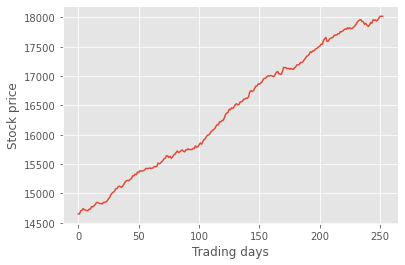

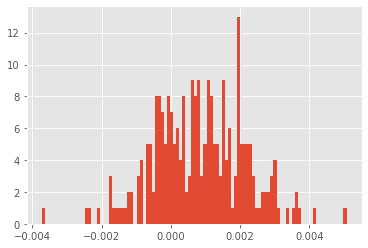

In [73]:
plt.plot(price_list)
plt.xlabel('Trading days')
plt.ylabel('Stock price')
plt.show()
plt.hist(daily_returns-1,100)
plt.show()

The real use here is to simulate the next year price trend from thousands of simulation based on the available mean and volatality data (based on last year data)

In [96]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm

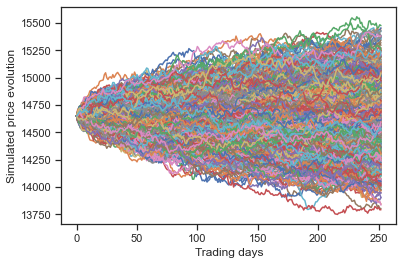

In [85]:
mu = daily_return.mean()
for i in range(1000): #all problem
  daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
  price_list=[S]
  for x in daily_returns:
    price_list.append(price_list[-1]*x)

  plt.plot(price_list)

plt.xlabel('Trading days')
plt.ylabel('Simulated price evolution')
plt.show()

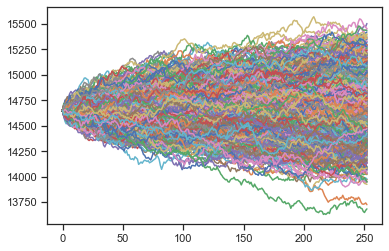

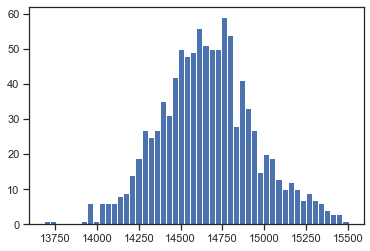

In [86]:
result=[]

for i in range(1000):
  

  daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
  price_list=[S]
  for x in daily_returns:
    price_list.append(price_list[-1]*x)

  plt.plot(price_list)

  result.append(price_list[-1])

plt.show()

plt.hist(result,bins=50)
plt.show()

In [87]:
expected_value=round(np.mean(result),2)
print('the trading simulation started with stock value = %2.2f dollar'%(S))
print('the mean value for next 252 days of trading for apple index will be = %2.2f dollar'%(expected_value))

the trading simulation started with stock value = 14650.00 dollar
the mean value for next 252 days of trading for apple index will be = 14660.10 dollar


In [88]:
print("25% quantile =",np.percentile(result,25))
print("75% quantile =",np.percentile(result,75))

25% quantile = 14468.336332403855
75% quantile = 14829.599537319664


In [89]:
np.mean(result)

14660.103204674102

In [90]:
np.percentile(result,1)

14020.32209735083

In [91]:
value_at_risk=np.mean(result)-np.percentile(result,1)
value_at_risk  #99% value at risk

639.7811073232715

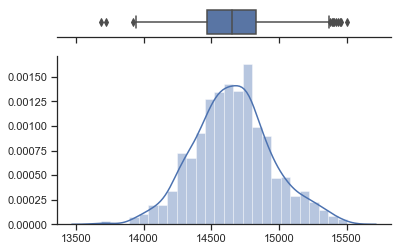

In [92]:

sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(result, ax=ax_box)
sns.distplot(result, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

[array([14468.3363, 13946.9158]), array([14829.5995, 15369.7702])]

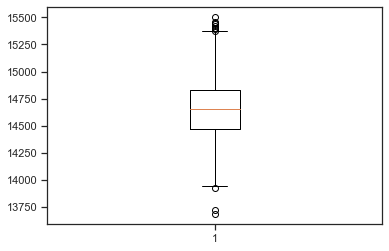

In [93]:
B = plt.boxplot(result)
[item.get_ydata() for item in B['whiskers']]

In [94]:
np.median(result)
upper_quartile = np.percentile(result, 75)
lower_quartile = np.percentile(result, 25)
iqr = upper_quartile - lower_quartile
print(iqr)
print(lower_quartile)
print(upper_quartile)

361.2632049158092
14468.336332403855
14829.599537319664
